In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

In [147]:
def gen_error(w1, w2):
    return 0.5 * (1 - norm.cdf(w1/np.sqrt(w1**2 + w2**2)) +  norm.cdf(-w1/np.sqrt(w1**2 + w2**2)))

In [148]:
reps = 5000
n = 4
m_list = np.arange(0, 20, 0.1)
theta_list = [0, 5, 30, 45, 60, 90]
df = pd.DataFrame()

for theta in theta_list:
    theta_rad = theta/180*np.pi
    k = 0
    for m in m_list.tolist():
        L = 0
        for i in range(reps):
            mu1 = (n + m*np.cos(theta_rad))/(n+m)
            mu2 = (-m*np.sin(theta_rad))/(n+m)
            sigma = 1/np.sqrt(n+m)
            w1 = np.random.normal(mu1, sigma)
            w2 = np.random.normal(mu2, sigma)
            L += gen_error(w1, w2)
        df.at[k, "m"] = m
        df.at[k, theta] = L/reps
        k += 1

In [155]:
dfm = df.melt(['m'], var_name='Theta', value_name='Risk')

(0.0, 20.0)

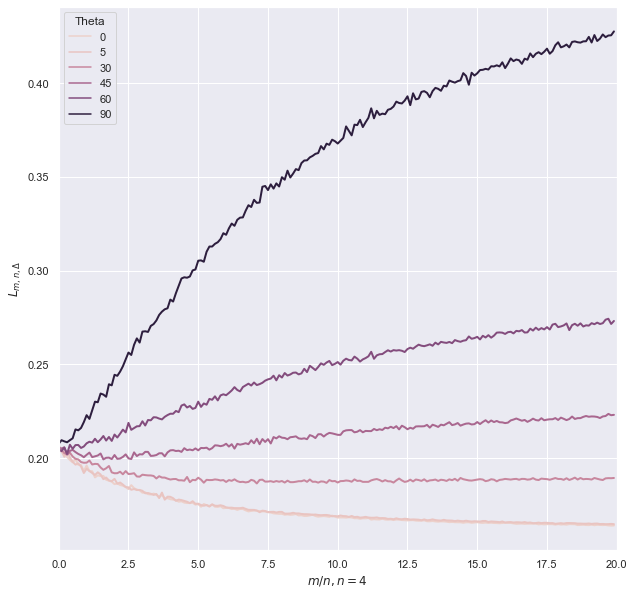

In [156]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk",hue="Theta", ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=4$")
ax.set_xlim([0, 20])

In [157]:
filename = "2d_fld"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

(0.0, 20.0)

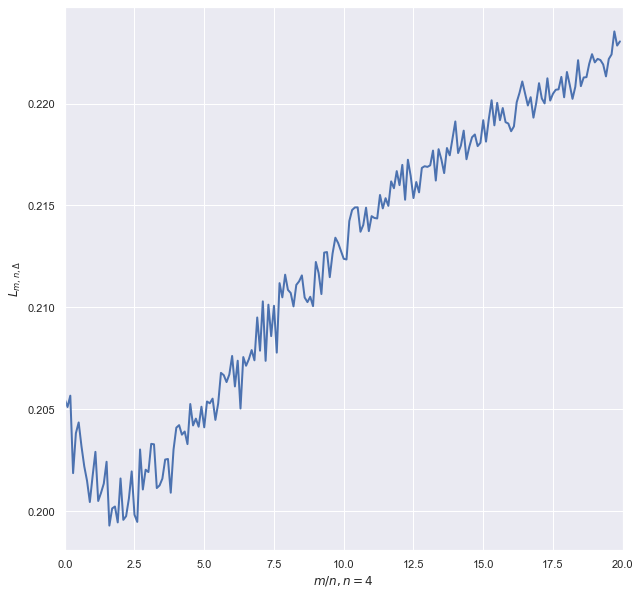

In [159]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=df, x="m", y=45, ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=4$")
ax.set_xlim([0, 20])

In [160]:
filename = "2d_fld_45"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [29]:
def gen_error(P, Q, A, mu, sigma):
    return 0.5 * (1 - norm.cdf((Q + A/(2*P) + mu)/sigma) +  norm.cdf((Q + A/(2*P) - mu)/sigma))

In [75]:
reps = 5000
n = 4
mu = 1
mu_0 = 0
sigma = 1
m_list = np.arange(0, 20, 0.1)
pi_in = 0.8
pi_out = 0.8
delta_list = [0.1, 1.5, 7]
df = pd.DataFrame()

for delta in delta_list:
    k = 0
    for m in m_list.tolist():
        L = 0
        for i in range(reps):
            mu_P = mu - m/(n+m)*(1-2*pi_out)*delta
            s_t = (1 + 4*pi_in*(1-pi_in)*(1-2*pi_in)**2*mu**2)
            s_s = (1 + 4*pi_out*(1-pi_out)*((1-2*pi_out)*mu-delta)**2)
            sigma_P = (n*s_t + m*s_s)/(n+m)**2
            mu_Q = mu_0
            sigma_Q = sigma**2*(1 + 8*mu**2*pi_in*(1-pi_in))/n
            P = np.random.normal(mu_P, np.sqrt(sigma_P))
            Q = np.random.normal(mu_Q, np.sqrt(sigma_Q))
            A = sigma*np.log((1-pi_in)/pi_in)
            L += gen_error(P, Q, A, mu, sigma)
        df.at[k, "m"] = m
        df.at[k, delta] = L/reps
        k += 1

In [76]:
dfm = df.melt(['m'], var_name='Delta', value_name='Risk')

(0.0, 20.0)

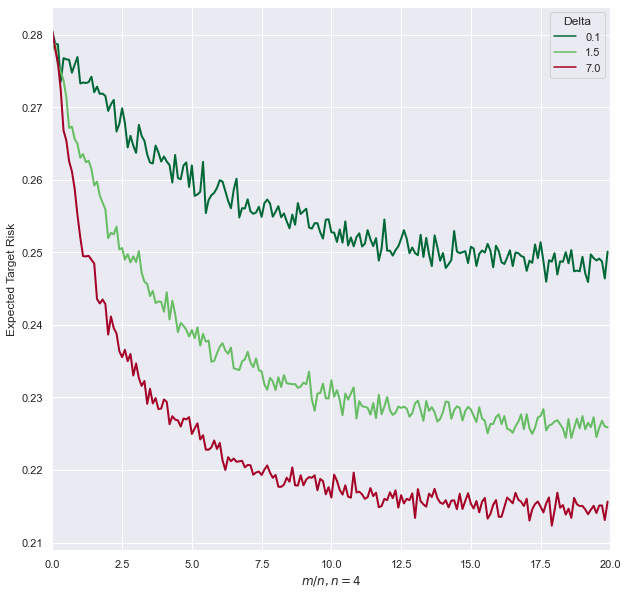

In [77]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk",hue="Delta", ax=ax, lw=2, palette='RdYlGn_r')
ax.set_ylabel("Expected Target Risk")
ax.set_xlabel(r"$m/n, n=4$")
ax.set_xlim([0,20])